<a href="https://colab.research.google.com/github/Pearlkakande/machinelearning/blob/EDA/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load and inspect the dataset




In [2]:
!pip install datasets
from datasets import load_dataset

# Load the dataset
ds = load_dataset("Eitanli/goodreads")

# Check dataset structure
print(ds)  # Shows splits (train/test/validation)
print("\nFeatures:", ds["train"].features)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 10.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 whi

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/737 [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


goodreads_data.csv:   0%|          | 0.00/11.7M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/10000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'Book', 'Author', 'Description', 'Genres', 'Avg_Rating', 'Num_Ratings', 'URL'],
        num_rows: 10000
    })
})

Features: {'Unnamed: 0': Value(dtype='int64', id=None), 'Book': Value(dtype='string', id=None), 'Author': Value(dtype='string', id=None), 'Description': Value(dtype='string', id=None), 'Genres': Value(dtype='string', id=None), 'Avg_Rating': Value(dtype='float64', id=None), 'Num_Ratings': Value(dtype='string', id=None), 'URL': Value(dtype='string', id=None)}


###  Convert to Pandas DataFrame (for EDA)

In [3]:
# Convert the "train" split to a DataFrame
import pandas as pd
df = ds["train"].to_pandas()

# Preview the data
print(f"Shape: {df.shape}")
df.head(3)

Shape: (10000, 8)


,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...


### EDA
1 Check Missing Values

In [4]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Unnamed: 0      0
Book            0
Author          0
Description    77
Genres          0
Avg_Rating      0
Num_Ratings     0
URL             0
dtype: int64


2 Distribution of Ratings

Index(['Unnamed: 0', 'Book', 'Author', 'Description', 'Genres', 'Avg_Rating',
       'Num_Ratings', 'URL'],
      dtype='object')


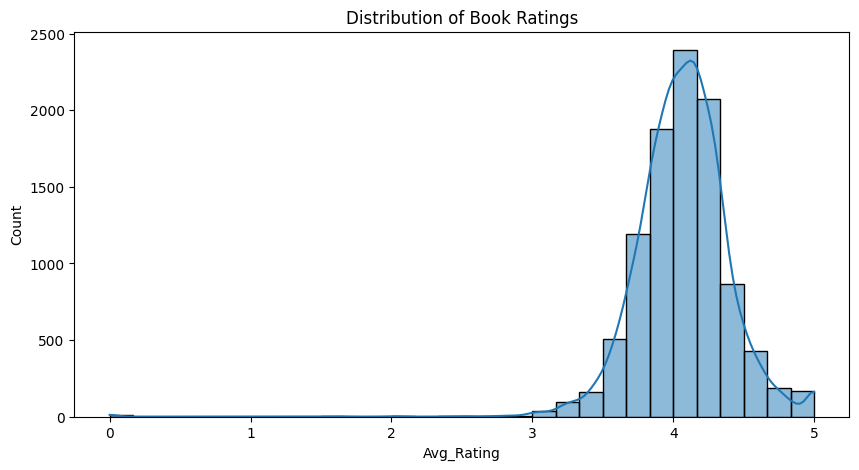

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for the correct column name and adjust accordingly
# Print the available columns to inspect:
print(df.columns)

# The correct column name is 'Avg_Rating'
plt.figure(figsize=(10, 5))
sns.histplot(df['Avg_Rating'], bins=30, kde=True)  # Use 'Avg_Rating'
plt.title("Distribution of Book Ratings")
plt.show()

3 Publication Year Analysis

### Prepare for GNNs/Cold Start
4.1 Identify Cold-Start Candidates

Books with minimal interaction data:

In [12]:
print(df.columns.tolist())

['Unnamed: 0', 'Book', 'Author', 'Description', 'Genres', 'Avg_Rating', 'Num_Ratings', 'URL']


### Convert Num_Ratings to Integer

In [15]:
# Clean and convert "Num_Ratings" to integer
df['Num_Ratings'] = df['Num_Ratings'].str.replace(',', '').astype(int)

# Now filter cold-start candidates
cold_start_books = df[df['Num_Ratings'] < 10]  # Works now!
print(f"Cold-start candidates: {len(cold_start_books)}")

# Analyze metadata
print("\nCold-start book examples:")
print(cold_start_books[['Book', 'Author', 'Genres', 'Avg_Rating']].head(5))

Cold-start candidates: 443

Cold-start book examples:
                                                   Book  \
3397                               Legacy of the Unsung   
3715      How the War Started (How the War Started, #1)   
3721          Home Made Pirates - A Story from the Seas   
3737  Joey Wheeler: The Official Character & Monster...   
3747     Broken: The Failed Promise of Muslim Inclusion   

                     Author Genres  Avg_Rating  
3397          Gary D. Henry     []        4.11  
3715           Alice Rhodes     []        4.00  
3721            Adnan Aslam     []        4.78  
3737  Arthur "Sam" Murakami     []        5.00  
3747       Evelyn Alsultany     []        0.00  


###  Verify Column Types





In [16]:
print(df.dtypes)

# If "Avg_Rating" is also a string:
df['Avg_Rating'] = df['Avg_Rating'].astype(float)

Unnamed: 0       int64
Book            object
Author          object
Description     object
Genres          object
Avg_Rating     float64
Num_Ratings      int64
URL             object
dtype: object


### 1 Distribution of Number of Ratings

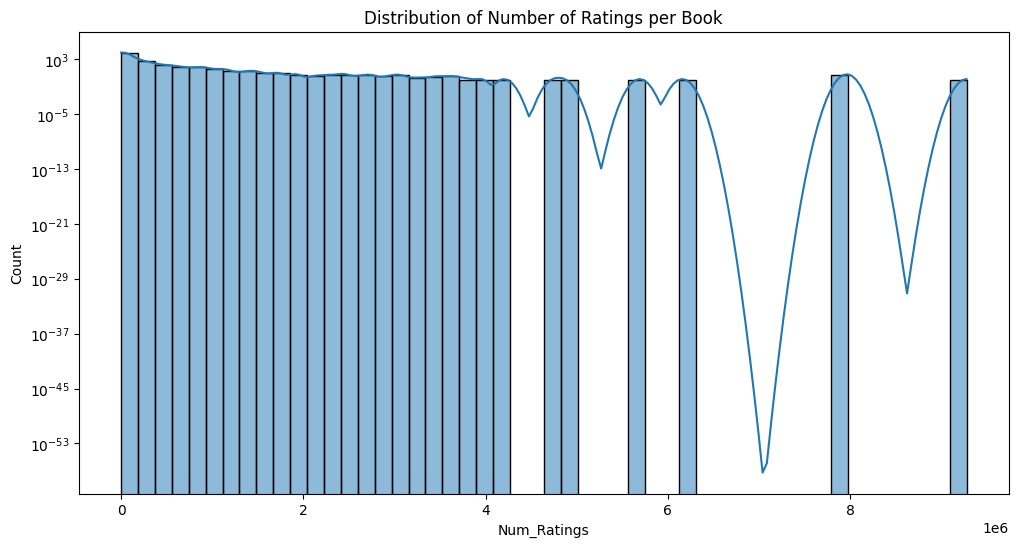

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Num_Ratings'], bins=50, kde=True)
plt.title("Distribution of Number of Ratings per Book")
plt.yscale('log')  # Use log scale for better visualization
plt.show()

### 2. Top Genres

<ipython-input-19-5a389519c68a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[count[1] for count in genre_counts],


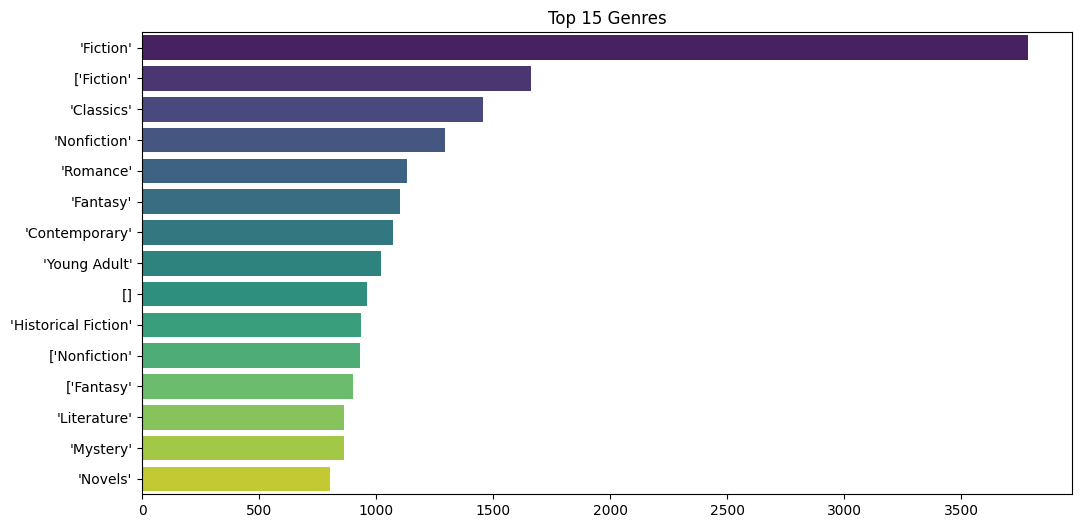

In [19]:
# Split genre lists (assuming genres are in a string like "Fantasy, Fiction")
df['Genres'] = df['Genres'].apply(lambda x: x.split(", ") if isinstance(x, str) else [])

# Count all genres
from collections import Counter
all_genres = [genre for sublist in df['Genres'] for genre in sublist]
genre_counts = Counter(all_genres).most_common(15)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=[count[1] for count in genre_counts],
            y=[count[0] for count in genre_counts],
            palette="viridis")
plt.title("Top 15 Genres")
plt.show()

### 3. Rating vs. Number of Ratings

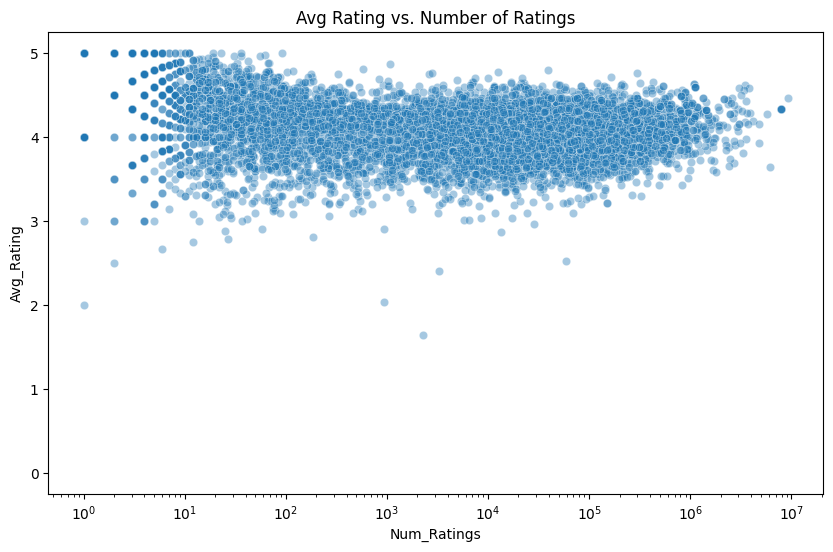

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Num_Ratings', y='Avg_Rating', data=df, alpha=0.4)
plt.title("Avg Rating vs. Number of Ratings")
plt.xscale('log')
plt.show()

## 4. Text Embedding with Descriptions

In [21]:
# Handle missing descriptions
df['Description'] = df['Description'].fillna("")

# Generate embeddings for first 100 descriptions
from transformers import AutoTokenizer, AutoModel
import torch

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

def embed_text(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).numpy()

sample_descriptions = df['Description'].head(100).tolist()
embeddings = [embed_text(desc) for desc in sample_descriptions]

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

## 5. Prepare for GNNs

### 1 Author Network Analysis

<ipython-input-22-1cced259a10f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors.values, y=top_authors.index, palette='viridis')


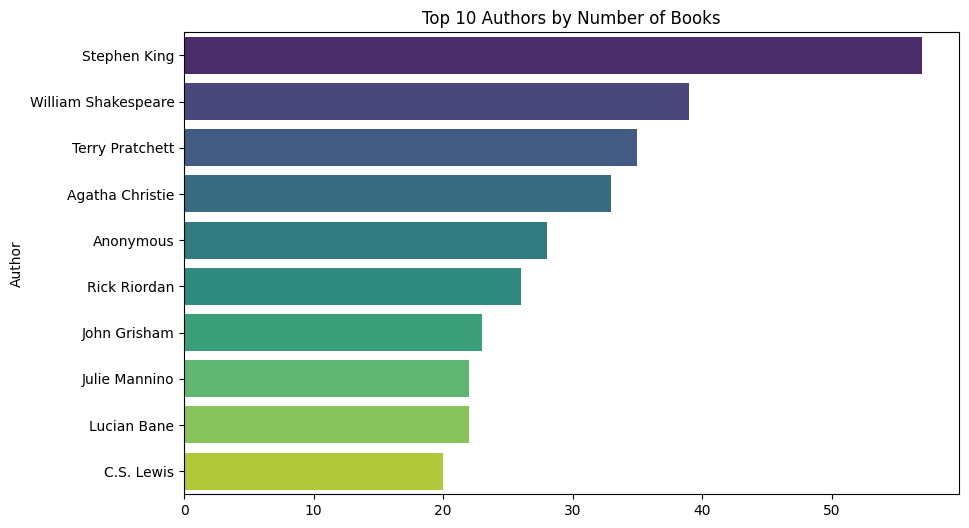

Graph nodes: 15931, edges: 9896


In [22]:
# Top authors
top_authors = df['Author'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_authors.values, y=top_authors.index, palette='viridis')
plt.title("Top 10 Authors by Number of Books")
plt.show()

# Author-Book graph (example)
import networkx as nx
G = nx.Graph()

# Add nodes and edges
for _, row in df.iterrows():
    G.add_node(row['Book'], node_type='book')
    G.add_node(row['Author'], node_type='author')
    G.add_edge(row['Book'], row['Author'], relationship='authored_by')

print(f"Graph nodes: {G.number_of_nodes()}, edges: {G.number_of_edges()}")

### 2 Genre Relationships

In [23]:
# Add genre nodes
for _, row in df.iterrows():
    for genre in row['Genres']:
        G.add_node(genre, node_type='genre')
        G.add_edge(row['Book'], genre, relationship='belongs_to')

print(f"Updated graph nodes: {G.number_of_nodes()}, edges: {G.number_of_edges()}")

Updated graph nodes: 17246, edges: 68106
